# 3D segmentation example

In [1]:
%matplotlib notebook
import sys
# sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
# from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step, axis
# import imutils

load file 

In [2]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

image is three-dimensional
found probability map /Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1_Probabilities.h5


check histogram of image data

<IPython.core.display.Javascript object>


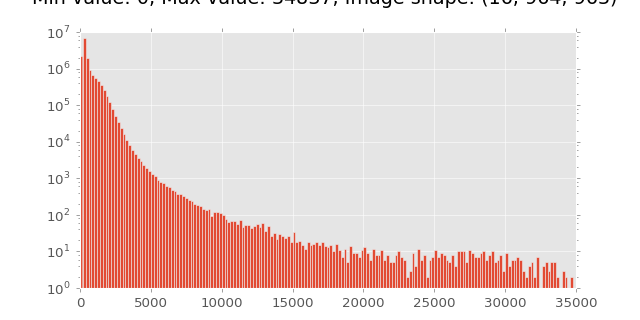

In [3]:
w.intensity_histogram()

In [4]:
# w.z_heat_map();

load Ilastik probability mask and plot it

In [4]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

shape (16, 964, 963) (16, 964, 963)
loaded probability map


do segmentation without the object classifier

In [5]:
w.segment(sigma=(1,3,3), min_distance=1, compactness=0.1, opensize_small_objects=10)

segmentation done, found 1181 cells


show segmentation

<IPython.core.display.Javascript object>


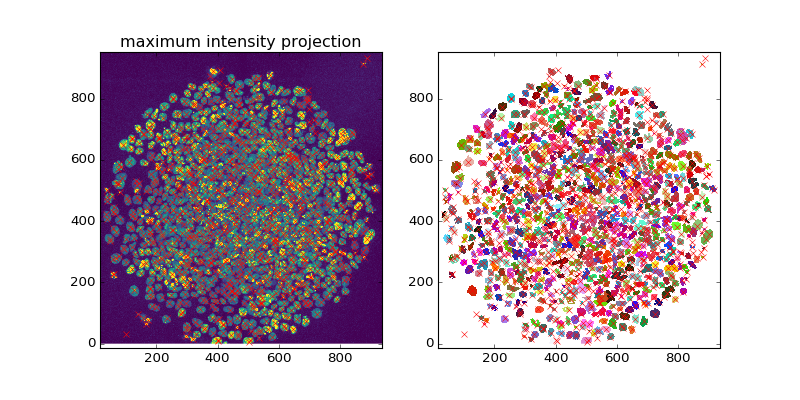

In [6]:
w.show_segmentation(z=None,figsize=(10,5))

In [7]:
w.df.shape[0]

1181

In [8]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,482,680221.0,1411.246888,"[2.48547717842, 256.784232365, 412.962655602]"
2,2665,5080696.0,1906.452533,"[5.03902439024, 285.543339587, 297.856660413]"
3,1107,1583992.0,1430.887082,"[2.2908762421, 289.041553749, 535.677506775]"
4,1298,2727125.0,2101.020801,"[2.60400616333, 317.19183359, 555.352850539]"
5,409,556054.0,1359.545232,"[1.93887530562, 367.178484108, 562.718826406]"


<IPython.core.display.Javascript object>


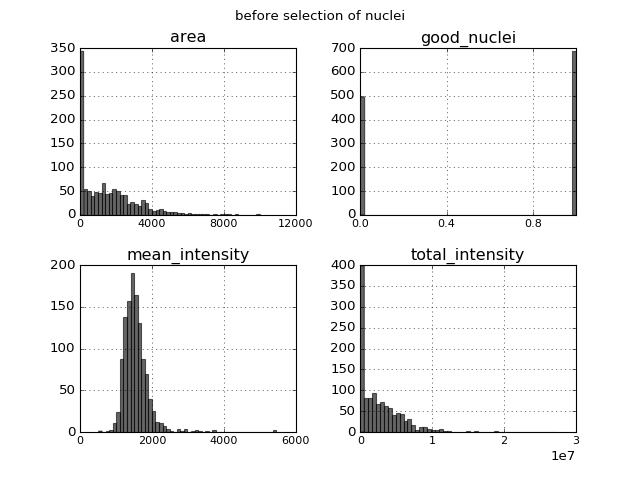

<IPython.core.display.Javascript object>


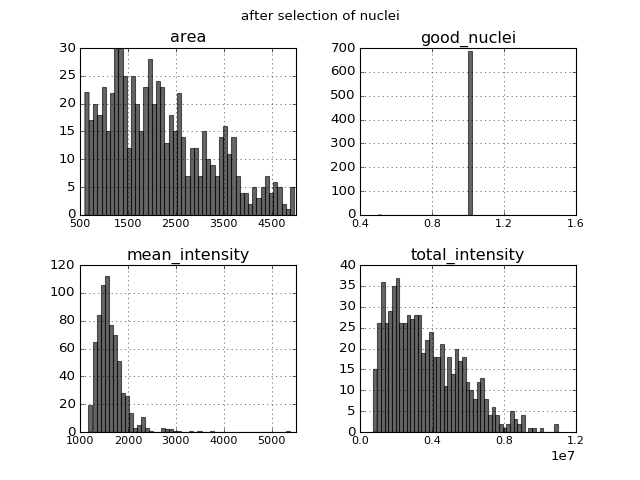

<IPython.core.display.Javascript object>


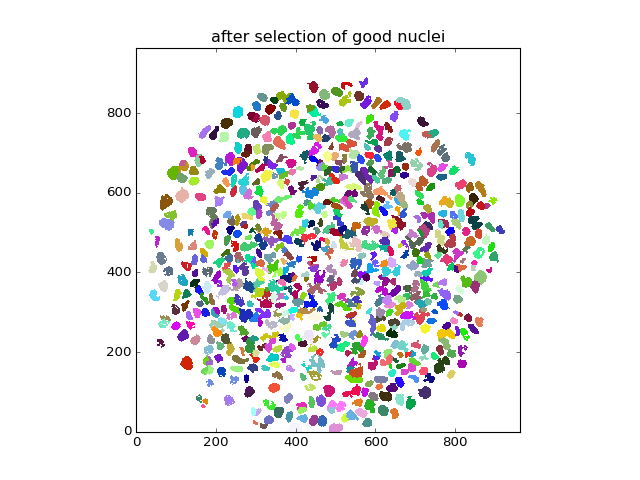

In [9]:
w.select_nuclei(quantiles=[0.2,0.85], cutoff=[600,5000], plot=1)

apply to other channels

In [10]:
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c3.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c4.tif'
# filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c2.tif'
# filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c3_bs.tif'
# filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c4.tif'
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c4.tif'

In [11]:
# s2=tiff.imread(filename_sox2)
# _,ax=subplots(1,2, figsize=(20,10))
# ax[0].imshow(s2[9], cmap='viridis', origin='lower')
# ax[1].imshow(w.remove_background(s2,2e5)[9], cmap='viridis', origin='lower')

In [12]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

In [13]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [14]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,sox2,bra,sox17
cell_id,,,,,,,,
1,482,680221.0,1411.246888,"[2.48547717842, 256.784232365, 412.962655602]",False,64484.1250,1141.8750,1707.250
2,2665,5080696.0,1906.452533,"[5.03902439024, 285.543339587, 297.856660413]",True,254182.0625,156945.9375,13907.625
3,1107,1583992.0,1430.887082,"[2.2908762421, 289.041553749, 535.677506775]",True,366819.6875,13916.3125,5729.875
4,1298,2727125.0,2101.020801,"[2.60400616333, 317.19183359, 555.352850539]",True,265167.1250,23354.8750,6132.250
5,409,556054.0,1359.545232,"[1.93887530562, 367.178484108, 562.718826406]",False,100450.0625,21347.9375,1104.625


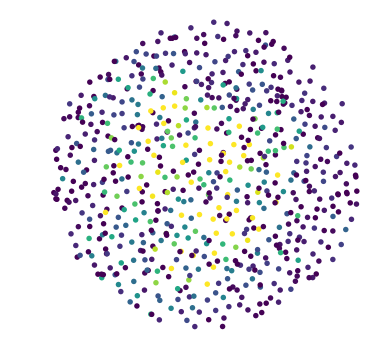

In [17]:
# watershed3d.dot_plot(w, 'sox2', colormap_cutoff=0.25, r_limit=300)
watershed3d.dot_plot(w, 'sox2', color_range=[0,1000000], r_limit=300)
# watershed3d.dot_plot(w, 'bra', colormap_cutoff=0.3)
# watershed3d.dot_plot(w, 'sox17', colormap_cutoff=0.5)

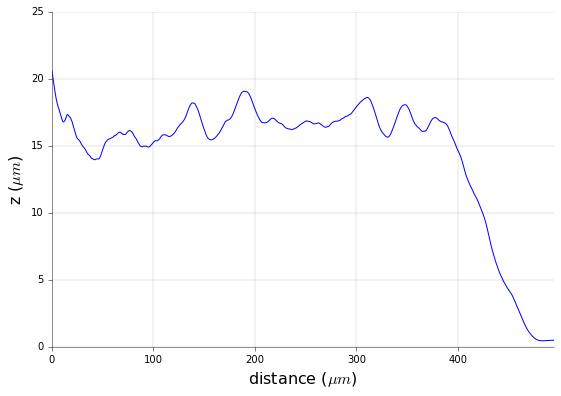

In [161]:
reload(watershed3d)
watershed3d.radial_z_height(w, z_scale=3.);

In [19]:
w.center,w.image_stack.shape

(array([   0.        ,  463.2114582 ,  493.76237183]), (16, 964, 963))

In [20]:
int(w.image_stack.shape[1])

964

<IPython.core.display.Javascript object>


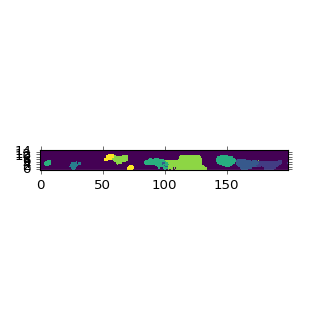

In [46]:
fig,ax=subplots(figsize=(4,4))
ax.imshow(w.ws[:,400,400:600])

In [87]:
# go through each index and change value according to z-position

a=np.zeros(w.ws.shape)
# for i1 in range(1,w.ws.max()+1):
for i1 in range(1,500):
    if i1%100==0:
        print(i1)
    a[w.ws==i1] = w.df.iloc[i1-1].centroid[0]

100
200
300
400


In [85]:
imshow(a[5])

In [97]:
b=np.zeros(w.ws.shape, dtype=np.int)
for i1 in range(b.shape[0]):
    b[i1]=i1

<IPython.core.display.Javascript object>


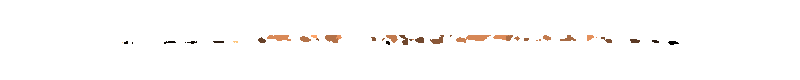

In [122]:
reload(watershed3d)
watershed3d.zview(w, cell_based=True, filename='pics/sideview3d_test.pdf')

<IPython.core.display.Javascript object>


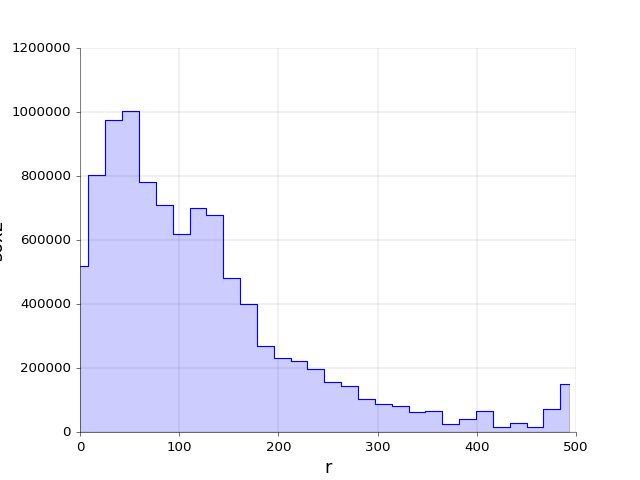

In [123]:
watershed3d.radial_profile_per_cell(w, 'sox2',30, only_selected_cells=1);
# w.radial_profile_per_cell('bra',20, only_selected_cells=1);
# w.radial_profile_per_cell('sox17',20, only_selected_cells=1);

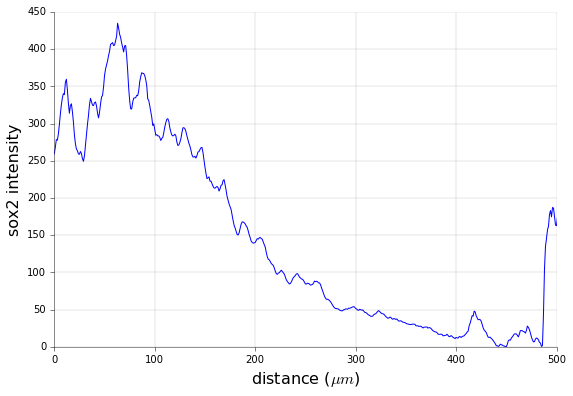

In [154]:
%matplotlib inline
reload(watershed3d)
r,rs = watershed3d.radial_intensity(w, 'sox2', only_selected_nuclei=1, plot=True, binsize=2, xcutoff=500)
# fig,ax=subplots()
# ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
# ax.set_xlim([0,450])
# ax.set_xlabel('r', fontsize=16)
# ax.set_ylabel('Sox2 intensity', fontsize=16)
# watershed3d.nice_spines(ax)

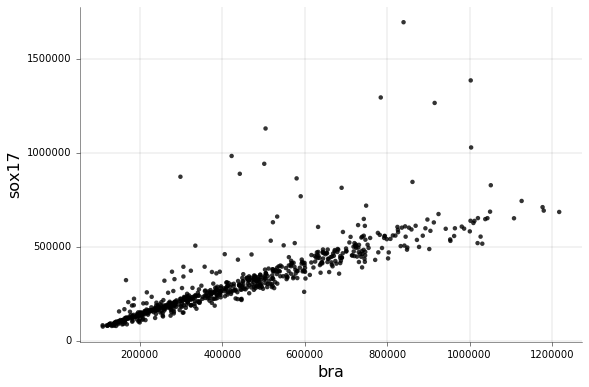

In [48]:
watershed3d.coexpression_per_cell(w, 'bra', 'sox17', only_selected_cells=1)

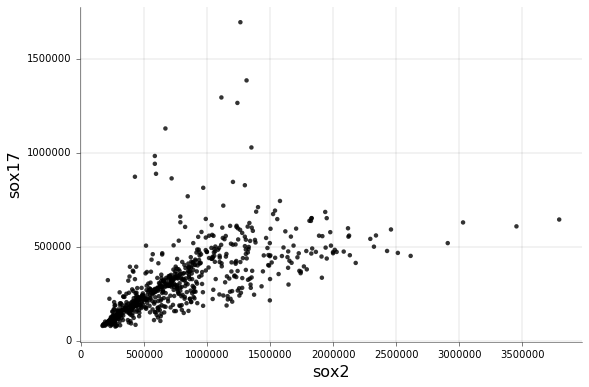

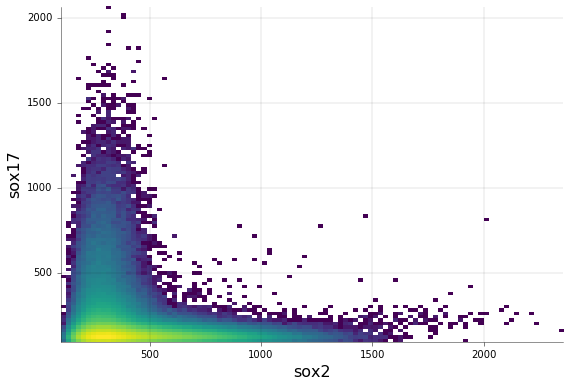

In [57]:
watershed3d.coexpression_per_cell(w, 'sox2', 'sox17', only_selected_cells=1)
watershed3d.coexpression_per_pixel(w, 'sox2', 'sox17', only_selected_cells=1, lognorm=1, bins=100)